In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from utils import *

In [41]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [42]:
df = pd.read_csv('dataset.csv')

In [43]:
df

,filename,width,height,class,bboxes,total_bolts
0,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[3530, 2445, 3730, 2644]]",1
1,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[351, 319, 546, 519]]",1
2,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[287, 1023, 486, 1227], [1404, 2490, 1604, 26...",3
3,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[272, 1018, 466, 1212], [1399, 2495, 1599, 26...",3
4,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[356, 389, 561, 588]]",1
...,...,...,...,...,...,...
102,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[326, 254, 526, 459], [2522, 269, 2722, 469],...",9
103,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[1484, 529, 1684, 723]]",1
104,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[336, 324, 536, 524]]",1
105,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[466, 469, 671, 663]]",1


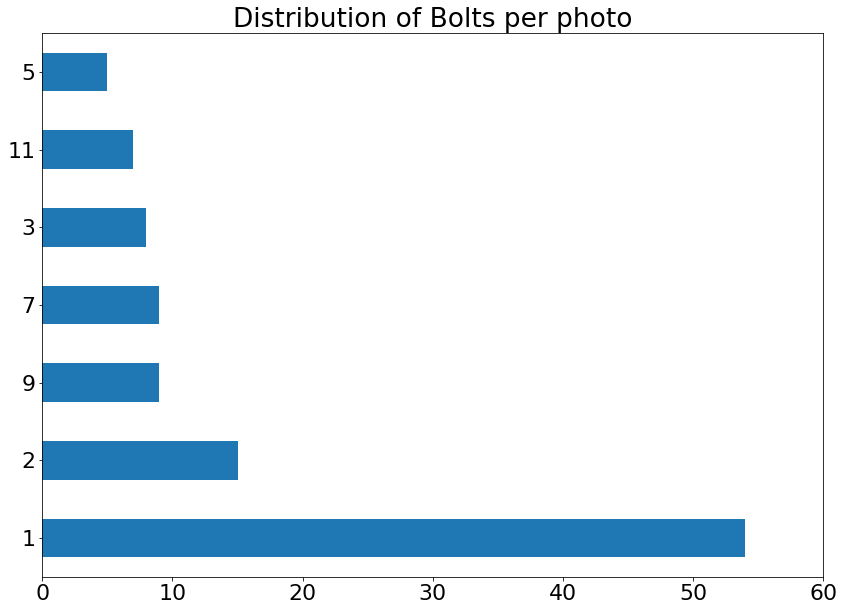

In [44]:
df.total_bolts.value_counts().plot(kind='barh')
plt.title('Distribution of Bolts per photo')
plt.xlim(0,60)
plt.show()

In [45]:
df['fold'] = -1

In [46]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[3530, 2445, 3730, 2644]]",1,-1
1,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[351, 319, 546, 519]]",1,-1
2,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[287, 1023, 486, 1227], [1404, 2490, 1604, 26...",3,-1
3,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[272, 1018, 466, 1212], [1399, 2495, 1599, 26...",3,-1
4,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[356, 389, 561, 588]]",1,-1
...,...,...,...,...,...,...,...
102,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[326, 254, 526, 459], [2522, 269, 2722, 469],...",9,-1
103,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[1484, 529, 1684, 723]]",1,-1
104,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[336, 324, 536, 524]]",1,-1
105,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[466, 469, 671, 663]]",1,-1


In [47]:
skf = StratifiedKFold(n_splits=5)

In [48]:
for fold_number, (train_index, val_index) in enumerate(skf.split(X=df['filename'], y=df['total_bolts'])):
    df.loc[df.iloc[val_index].index, 'fold'] = fold_number

In [49]:
df.fold.value_counts()

1    22
0    22
4    21
3    21
2    21
Name: fold, dtype: int64

In [50]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[3530, 2445, 3730, 2644]]",1,0
1,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[351, 319, 546, 519]]",1,0
2,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[287, 1023, 486, 1227], [1404, 2490, 1604, 26...",3,0
3,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[272, 1018, 466, 1212], [1399, 2495, 1599, 26...",3,0
4,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[356, 389, 561, 588]]",1,0
...,...,...,...,...,...,...,...
102,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[326, 254, 526, 459], [2522, 269, 2722, 469],...",9,4
103,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[1484, 529, 1684, 723]]",1,4
104,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[336, 324, 536, 524]]",1,4
105,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[466, 469, 671, 663]]",1,4


In [51]:
df.to_csv('dataset_strat.csv', index=False)